<a href="https://colab.research.google.com/github/billiahkerubo1/Week9-Independent-Project/blob/main/Spam_Classification_Naive_Bayesian_Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SPAM CLASSIFICATION**

# Defining the question

Identifying whether a mail received is a spam or not.

# Defining the metrics of success

The metric of success used is the confusion matrix and the accuracy score. The confusion matrix wll determine th eproper cassification and the number of wrong classification. The accuracy metric will measure ow good a model is. The best model should be more than 80% accurate.

# Understanding the context

The context is mail classification. Many times we receive mails but do not know whether they are legitimat or not. Studying and analysing the contents of the mails, one can identify the mails to be spam or not. The Naive Bayes algorithm makes the exercise easier through classification.

# Recording the Experimental Design

1 Exploratory Data Analysis

2 Data Cleaning

3 Univariate, Bivariate Analysis

4 Visualizations

5.Challenging the solution: Challenging the solution in this context is to use confusion matrix in addition to the accuracy score. Another challenge is to use different amount of training dataset while training the model.

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading and understanding the data

In [2]:
# the names have been read by notepad
names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 
         'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 
         'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 
         'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 
         'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 
         'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 
         'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 
         'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 
         'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 
         'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 
         'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 
         'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'spam']

In [3]:
df = pd.read_csv('/content/spambase.data', names = names)
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
# previewing the last records
df.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [5]:
df2 = pd.read_csv('/content/spambase (1).names', sep='\t')
df2.head(20)

,| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
0,|
1,"| 48 continuous real [0,100] attributes of typ..."
2,| = percentage of words in the e-mail that mat...
3,| i.e. 100 * (number of times the WORD appears...
4,"| total number of words in e-mail. A ""word"" i..."
5,| string of alphanumeric characters bounded by...
6,| characters or end-of-string.
7,|
8,"| 6 continuous real [0,100] attributes of type..."
9,| = percentage of characters in the e-mail tha...


In [6]:
#checking the size of the  records
df.shape

(4601, 58)

The data has 4601 rows and 58 columns.

In [7]:
#checking for null values
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

The data has no null values.

In [8]:
# make a copy of the dataframe to work with
df1 = df.copy()

In [10]:
#checking for duplicates
df1.duplicated().sum()

391

There 391 duplicates, which have to be dropped

In [11]:
#drop duplicates
df1.drop_duplicates(inplace = True)
df1.duplicated().sum()

0

In [12]:
#checking the information on dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4210 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4210 non-null   float64
 1   word_freq_address           4210 non-null   float64
 2   word_freq_all               4210 non-null   float64
 3   word_freq_3d                4210 non-null   float64
 4   word_freq_our               4210 non-null   float64
 5   word_freq_over              4210 non-null   float64
 6   word_freq_remove            4210 non-null   float64
 7   word_freq_internet          4210 non-null   float64
 8   word_freq_order             4210 non-null   float64
 9   word_freq_mail              4210 non-null   float64
 10  word_freq_receive           4210 non-null   float64
 11  word_freq_will              4210 non-null   float64
 12  word_freq_people            4210 non-null   float64
 13  word_freq_report            4210 

In [13]:
#checking for unique values
df1.nunique()

word_freq_make                 142
word_freq_address              171
word_freq_all                  214
word_freq_3d                    43
word_freq_our                  255
word_freq_over                 141
word_freq_remove               173
word_freq_internet             170
word_freq_order                144
word_freq_mail                 245
word_freq_receive              113
word_freq_will                 316
word_freq_people               158
word_freq_report               133
word_freq_addresses            118
word_freq_free                 253
word_freq_business             197
word_freq_email                229
word_freq_you                  575
word_freq_credit               148
word_freq_your                 401
word_freq_font                  99
word_freq_000                  164
word_freq_money                143
word_freq_hp                   395
word_freq_hpl                  281
word_freq_george               240
word_freq_650                  200
word_freq_lab       

# 3. Exploratory Data Analysis

## a. Univariate Analysis

In [14]:
 #Getting statistical summaries
df1.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,0.056686,0.565204,0.097656,0.061211,0.044803,0.253829,0.149154,0.188755,1.718368,0.084962,0.810040,0.131587,0.100622,0.090969,0.573995,0.279330,0.369838,0.128575,0.098382,0.103779,0.063544,0.044917,0.102333,0.045777,0.107881,0.099368,0.143482,0.014190,0.084057,0.061278,0.041432,0.141542,0.048772,0.085266,0.320124,0.189375,0.005786,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,0.184167,0.882513,0.309309,0.346066,0.242186,0.797534,0.457669,0.541133,1.768760,0.505583,1.149352,1.071258,0.351336,0.431723,1.676539,0.905553,1.775330,0.535429,0.576796,0.439568,0.387267,0.300748,0.569146,0.301812,0.530263,0.386470,0.424508,0.230512,0.447991,0.319520,0.318177,0.793803,0.231871,0.646096,1.045914,0.928308,0.079170,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [15]:
#  checking for mean, standard deviation, variance, skewness and kurtosis
for column in names:
  print('\n')
  print(column + ',Mean: ' + str(df1[column].mean()))
  print(column + ', Standard deviation: '+ str(df1[column].std()))
  print(column + ', Variance: '+ str(df1[column].var()))
  print(column + ', Skewness: '+ str(df1[column].skew()))
  print(column + ', Kurtosis: '+ str(df1[column].kurt()))



word_freq_make,Mean: 0.10436579572446555
word_freq_make, Standard deviation: 0.3000048929174964
word_freq_make, Variance: 0.09000293577443848
word_freq_make, Skewness: 5.869855242999023
word_freq_make, Kurtosis: 54.35140555393713


word_freq_address,Mean: 0.11265558194774354
word_freq_address, Standard deviation: 0.45426003173290125
word_freq_address, Variance: 0.20635217642997647
word_freq_address, Skewness: 13.464663617099461
word_freq_address, Kurtosis: 306.6859733110557


word_freq_all,Mean: 0.29147268408551075
word_freq_all, Standard deviation: 0.5157185414620596
word_freq_all, Variance: 0.26596561400775415
word_freq_all, Skewness: 2.980622758226944
word_freq_all, Kurtosis: 12.941446887016067


word_freq_3d,Mean: 0.06307838479809978
word_freq_3d, Standard deviation: 1.3524868029603305
word_freq_3d, Variance: 1.8292205521818556
word_freq_3d, Skewness: 27.209539135206047
word_freq_3d, Kurtosis: 788.3700579065502


word_freq_our,Mean: 0.32532066508313484
word_freq_our, Standard dev

Most of the columns in the dataset show that the data is not normally distributed by the level of skewness such as char_freq, with a skewness of 31.5. Therefore, there is need for scaling.

In [16]:
# Interquantile range

for column in names:
  print('\n')
  print(df1[column].quantile([0.25, 0.5, 0.75]))
  print(df1[column].quantile([0.25, 0.5, 0.75]))



0.25    0.0
0.50    0.0
0.75    0.0
Name: word_freq_make, dtype: float64
0.25    0.0
0.50    0.0
0.75    0.0
Name: word_freq_make, dtype: float64


0.25    0.0
0.50    0.0
0.75    0.0
Name: word_freq_address, dtype: float64
0.25    0.0
0.50    0.0
0.75    0.0
Name: word_freq_address, dtype: float64


0.25    0.00
0.50    0.00
0.75    0.44
Name: word_freq_all, dtype: float64
0.25    0.00
0.50    0.00
0.75    0.44
Name: word_freq_all, dtype: float64


0.25    0.0
0.50    0.0
0.75    0.0
Name: word_freq_3d, dtype: float64
0.25    0.0
0.50    0.0
0.75    0.0
Name: word_freq_3d, dtype: float64


0.25    0.00
0.50    0.00
0.75    0.41
Name: word_freq_our, dtype: float64
0.25    0.00
0.50    0.00
0.75    0.41
Name: word_freq_our, dtype: float64


0.25    0.0
0.50    0.0
0.75    0.0
Name: word_freq_over, dtype: float64
0.25    0.0
0.50    0.0
0.75    0.0
Name: word_freq_over, dtype: float64


0.25    0.0
0.50    0.0
0.75    0.0
Name: word_freq_remove, dtype: float64
0.25    0.0
0.50    0.0
0

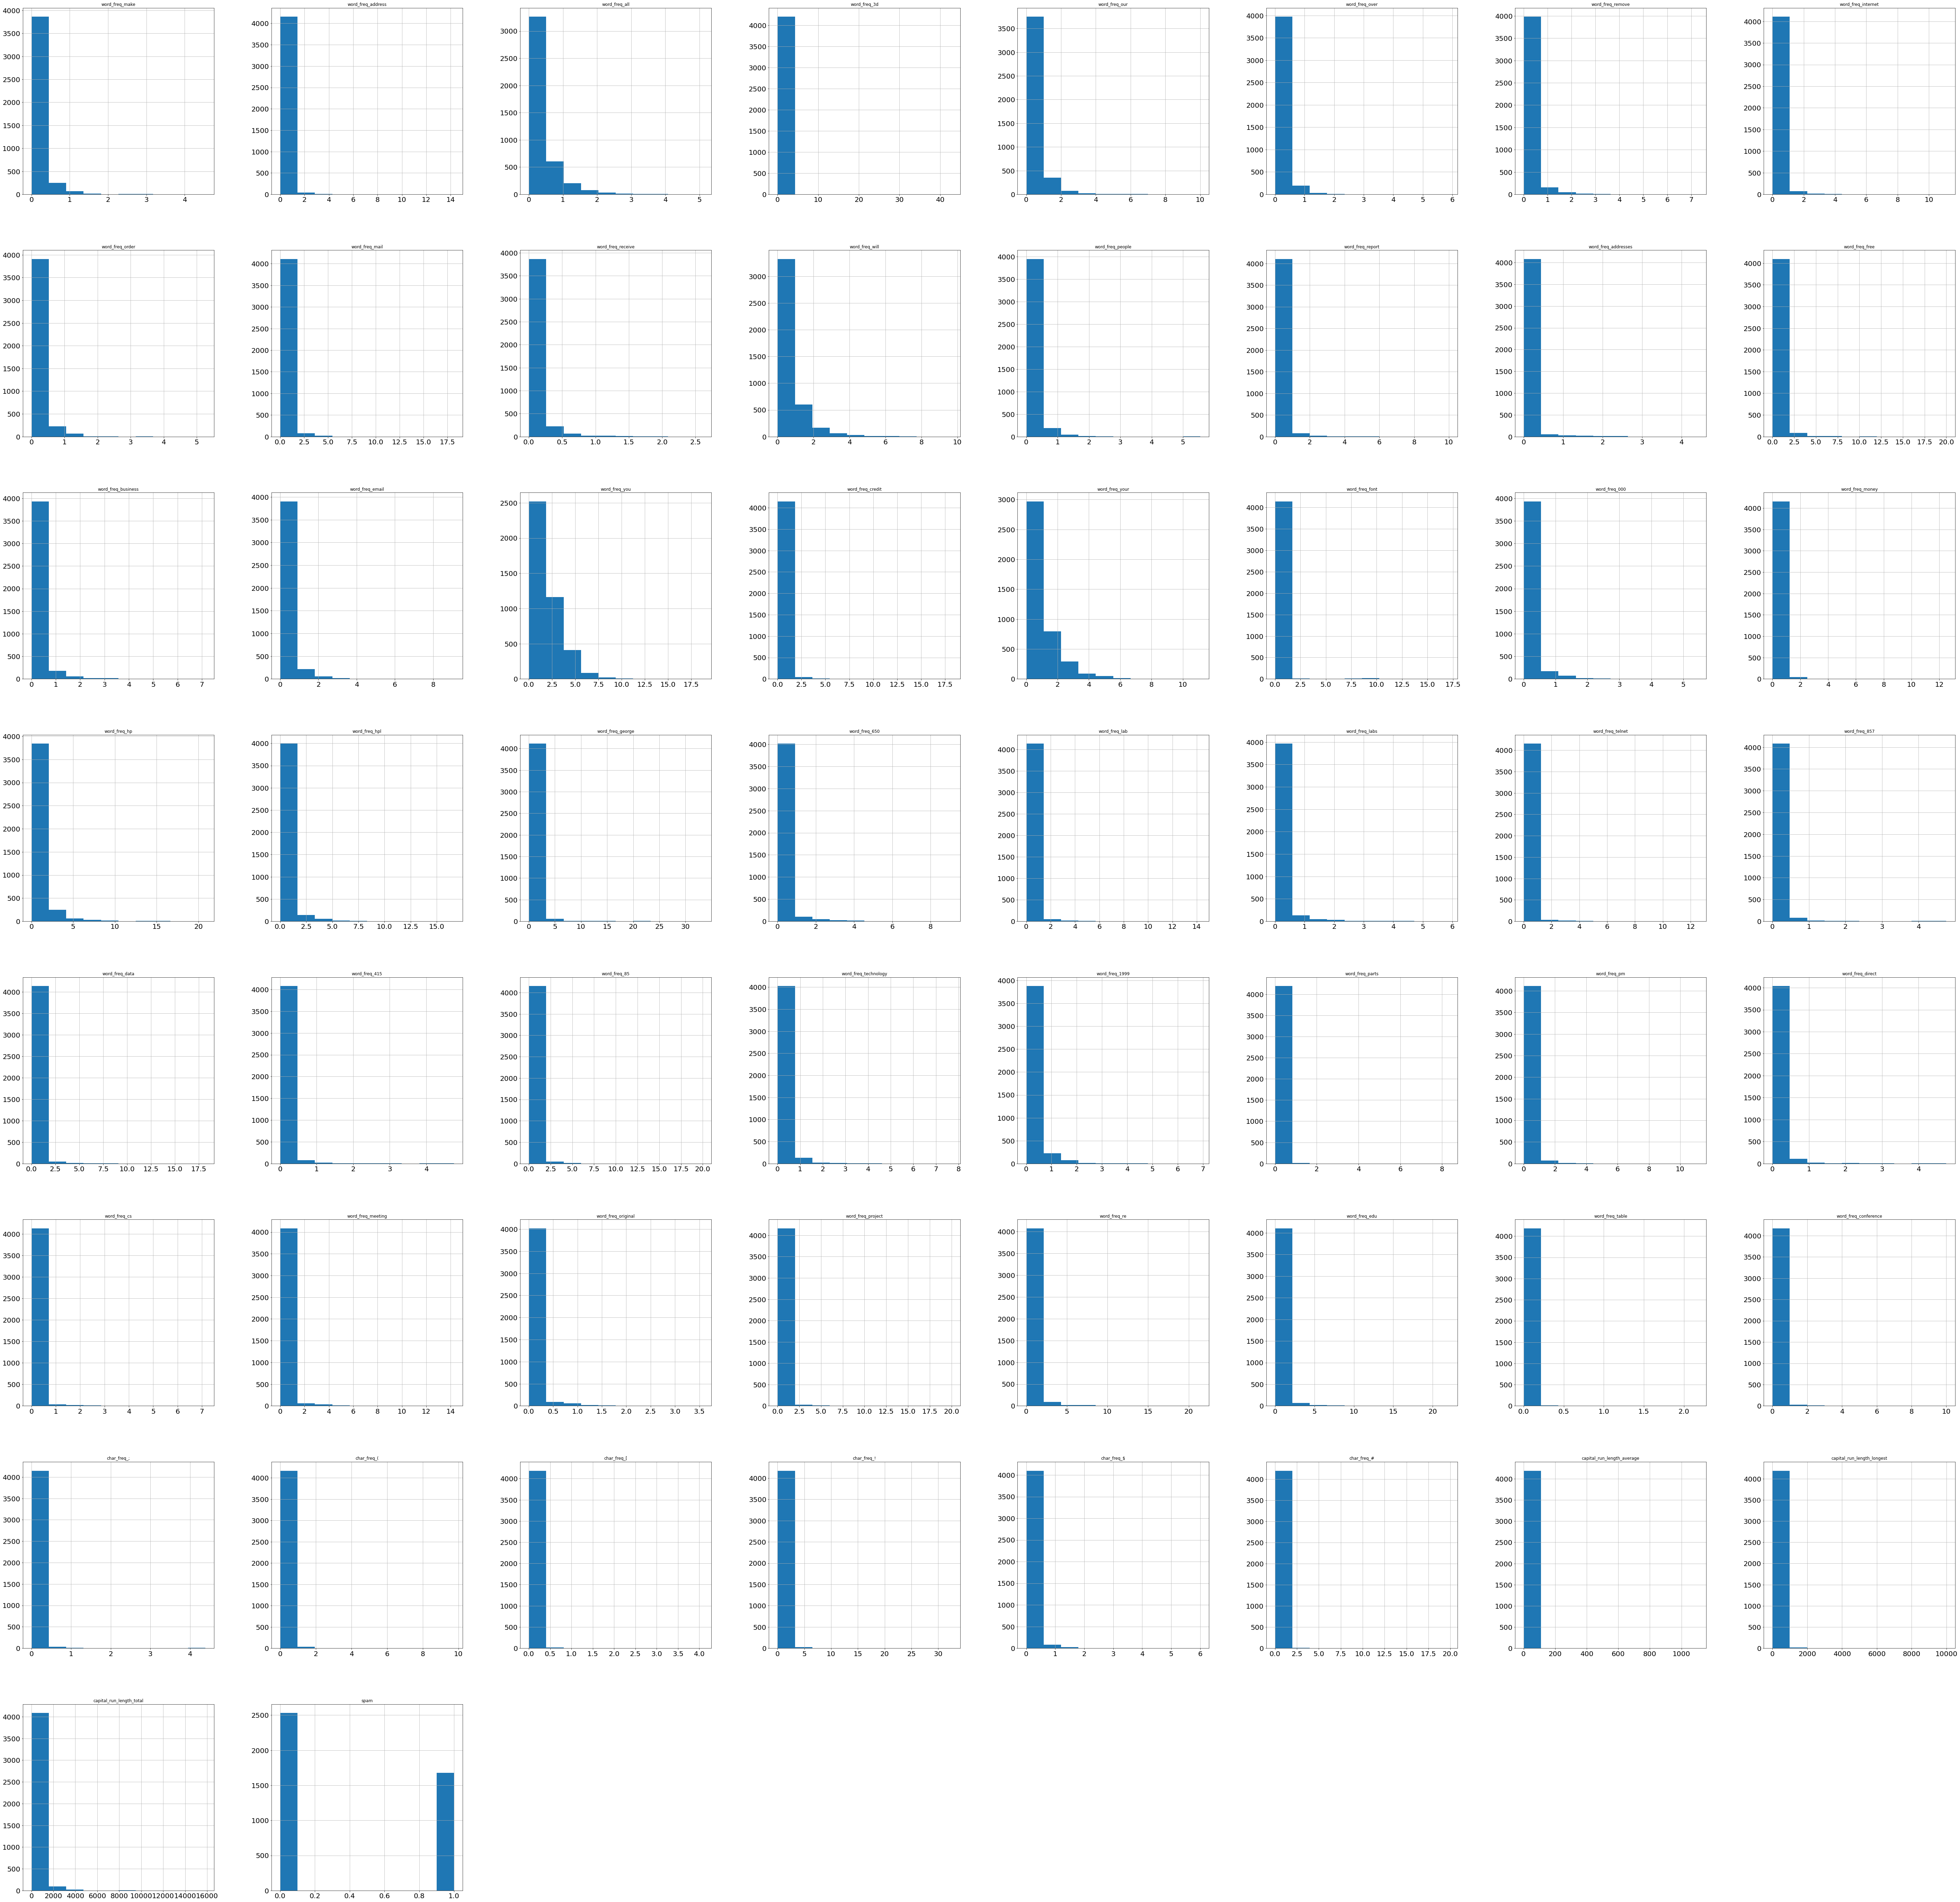

In [17]:
# histograms to show distributions
df1.hist(figsize=(100,100), sharex=False, sharey=False, xlabelsize= 20, ylabelsize=20)
plt.show()

The histograms show there is no normally distributed record.

## b. Bivariate Analysis

In [18]:
# Check for correlation to see how the variables influence each other
correlations = df1.corr()
correlations

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,0.034012,0.063207,0.005388,0.021740,0.055067,0.011061,-0.004370,0.103842,0.040829,0.063031,0.075911,0.061985,0.032263,0.022454,0.065443,0.081471,0.051571,0.120563,0.020924,0.121458,-0.025574,0.126478,0.205689,-0.075054,-0.063467,-0.048086,-0.050054,-0.041541,-0.054241,-0.038899,-0.031634,-0.042715,-0.026322,-0.046083,-0.057296,-0.058771,-0.008626,-0.011199,-0.035467,-0.005280,-0.026546,-0.025603,-0.022980,-0.037848,-0.034455,-0.000950,-0.018904,-0.027248,-0.019636,-0.034784,0.059184,0.101957,-0.009149,0.044783,0.059128,0.084127,0.129194
word_freq_address,0.034012,1.000000,0.027789,-0.008947,0.036975,0.005526,0.077374,0.013706,0.053426,0.184304,0.060724,0.026247,0.015538,0.012414,0.061826,0.046630,0.022018,0.178853,0.055876,-0.006735,0.117797,0.001214,0.007064,0.061282,-0.053573,-0.044627,-0.011228,-0.033000,-0.026048,-0.029419,-0.015937,0.028852,-0.032575,0.026039,-0.025524,-0.028262,0.003749,-0.012708,-0.016208,0.002326,-0.019350,-0.035908,0.037681,-0.029055,0.020029,-0.026004,-0.012337,-0.020947,0.014735,-0.028348,-0.019436,0.031858,0.044354,0.030669,0.029355,0.053870,0.034590,0.100651
word_freq_all,0.063207,0.027789,1.000000,-0.019901,0.065676,0.066547,0.028581,0.007221,0.077561,0.025138,0.055647,0.065733,0.036431,0.004900,0.104574,0.061937,0.029834,0.110794,0.126502,0.030874,0.147895,-0.039464,0.106694,0.031150,-0.092684,-0.066464,-0.081297,-0.051471,-0.057847,-0.030519,-0.036610,-0.063579,-0.058002,-0.063417,-0.048968,-0.047593,-0.074329,0.031756,-0.017418,-0.046013,-0.030822,-0.007620,-0.052736,-0.056883,-0.056600,-0.060558,0.027384,-0.029465,-0.036778,-0.024545,-0.035805,0.097316,0.072944,-0.004520,0.095671,0.092513,0.051961,0.172350
word_freq_3d,0.005388,-0.008947,-0.019901,1.000000,0.000256,-0.009163,0.014289,0.003801,-0.001040,-0.003845,-0.013191,-0.018577,-0.013153,0.003379,0.005375,0.005798,-0.002827,0.016561,-0.009933,-0.005006,0.004577,0.030589,0.014715,0.025851,-0.015702,-0.014030,-0.009710,-0.010630,-0.007931,-0.010911,-0.007654,-0.006967,-0.008246,-0.006975,-0.005907,-0.006309,-0.007436,-0.002723,-0.004506,-0.007654,-0.006075,-0.008318,-0.009384,-0.006114,-0.013178,-0.009432,-0.003409,-0.001861,-0.000028,-0.011443,-0.007514,-0.003867,0.008273,0.000134,0.005754,0.022105,0.023785,0.056383
word_freq_our,0.021740,0.036975,0.065676,0.000256,1.000000,0.041392,0.135957,0.023411,0.014483,0.027233,0.079164,0.055007,0.020657,0.001586,0.048309,0.079198,0.137868,0.050785,0.083092,0.027838,0.142992,-0.022715,0.062136,0.000321,-0.076783,-0.079807,-0.062482,-0.064151,0.039627,-0.053613,-0.042054,-0.024256,-0.034749,-0.024555,-0.051058,-0.052210,-0.077682,0.133057,-0.045512,-0.017580,-0.052325,0.107706,-0.054583,0.002771,-0.049497,-0.083315,-0.028146,-0.035040,-0.035049,-0.054580,-0.027988,0.019203,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230074
word_freq_over,0.055067,0.005526,0.066547,-0.009163,0.041392,1.000000,0.046868,0.079704,0.097037,0.010099,0.056592,0.001582,0.067278,0.007932,0.140009,0.016681,0.057684,0.059196,0.083312,0.057502,0.105693,0.006869,0.181754,0.059429,-0.086682,-0.089520,-0.05

Th variables are very lowly correlated. This means that they do not influence each other and if they do, then it is on a very minimal scale.

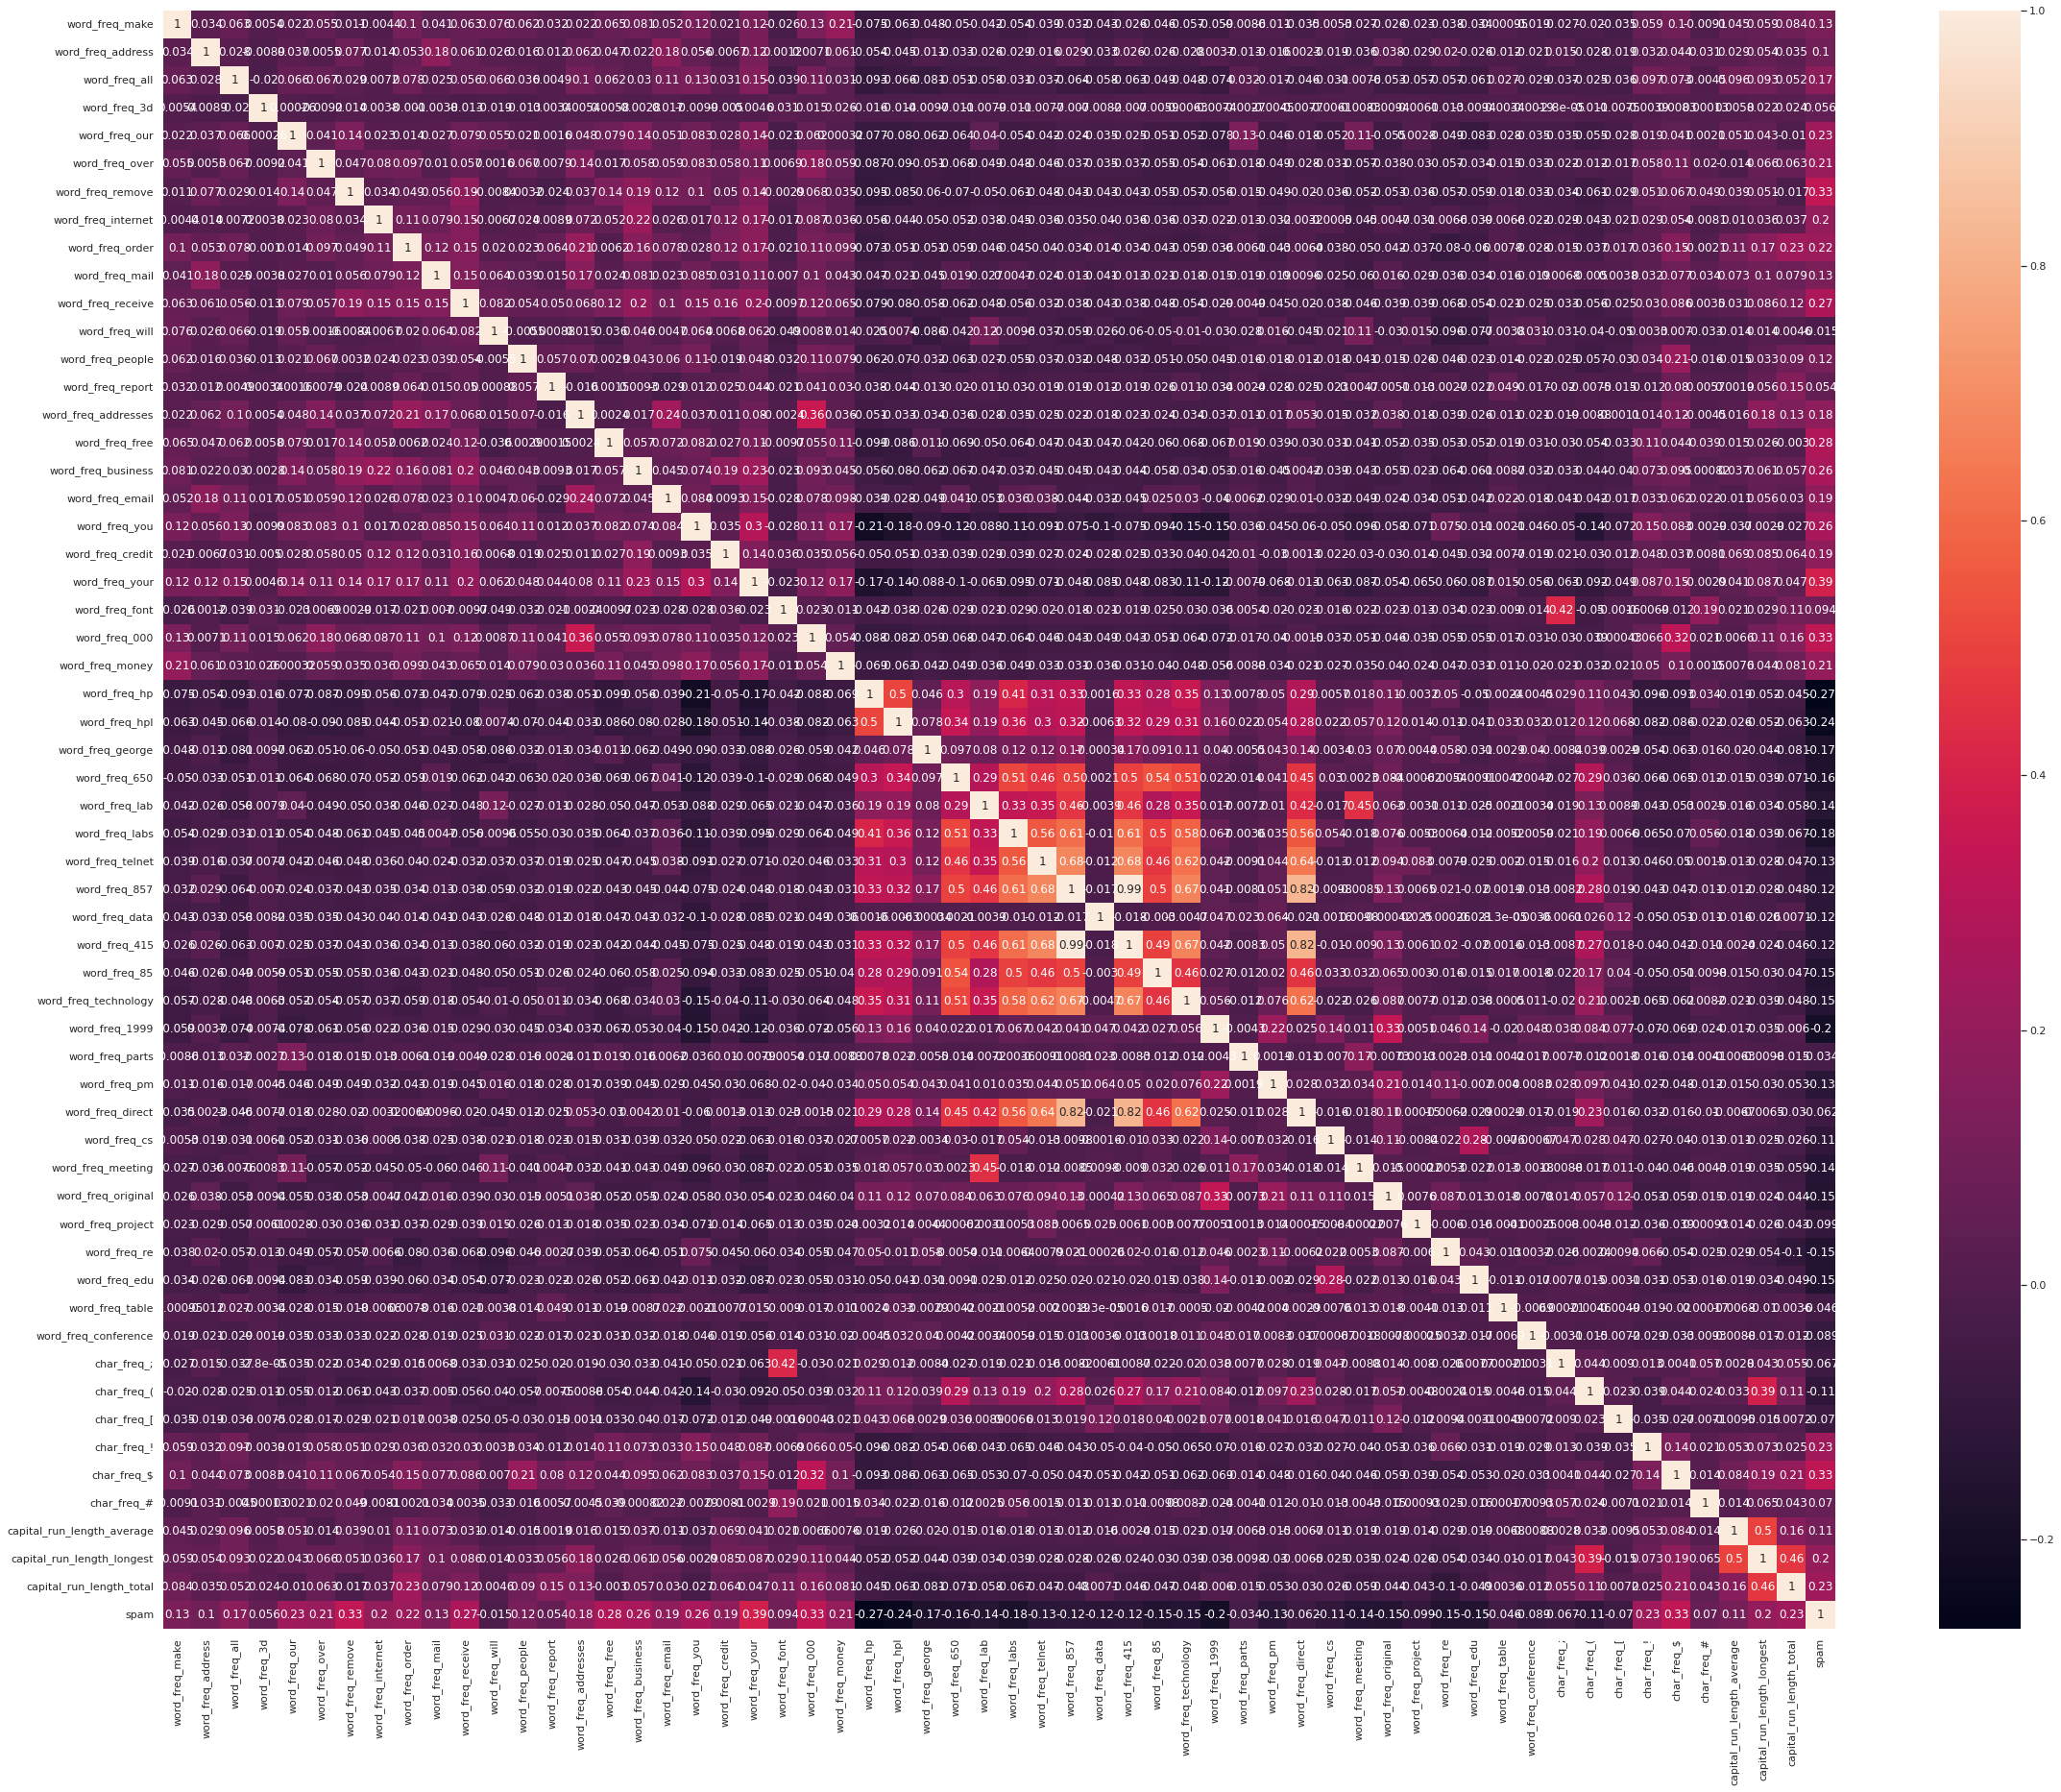

In [19]:
sns.set(rc = {'figure.figsize':(39,31)})
sns.heatmap(correlations,xticklabels = correlations.columns, yticklabels = correlations.columns, annot=True)


The heatmap visualizes the correlations shown above.

# 4. Naive Bayes Classification

 It is a classification algorithm which helps in building the fast machine learning models that can make quick predictions. It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.
 In this case, we will use Bernoulli Naive Bayes because the classes are binary.

In [20]:
# The first thing to do is splitting the dataset into features and labels
X = df1.drop('spam', axis = 1)
y = df1.spam

In [21]:
# Train Test Split
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [22]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

The standardScaler reduces the range of the values.

In [23]:
# Training our Bernoulli Naive Bayes Classifier

from sklearn.naive_bayes import BernoulliNB

# Creating oour Bernoulli Naive Bayes object with prior probabilities of each class
clf = BernoulliNB()

# Train model
model = clf.fit(X, y)

# model score
model.score(X, y)

# Prediction
y_pred = model.predict(X_test)

predicted = model.predict(X_test)

print(np.mean(y_pred == y_test))

0.9073634204275535


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  "X does not have valid feature names, but"


The accuracy is 90% To increase certainty, the confusion matrix will be used for further evaluation of the prediction classification of the model.

In [24]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[485  23]
 [ 55 279]]


 23 legitimate messages have been classified as spam and 55 spam messages classified as legitimate. However, the error is minimal since there are many correct classifications of the emails.

We will have to use 30% of the data as test data to see the difference in the model classification power.

In [46]:
# Train Test Split
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [47]:
 #Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# Training our Bernoulli Naive Bayes Classifier

from sklearn.naive_bayes import BernoulliNB

# Creating oour Bernoulli Naive Bayes object with prior probabilities of each class
clf = BernoulliNB()

# Train model
model = clf.fit(X, y)

# model score
model.score(X, y)


0.8888361045130642

The accuracy of the model is 88.7%, which is agood value. We will however need to evaluate the model further using the confusion matrix.

In [50]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[739  25]
 [109 390]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  "X does not have valid feature names, but"


25 legitimate mails have been classified as spam while 100 spam mails have been classified as legitimate. The number of correct classification is higher than the wrong classification,making it an okay model.

We will have to use 40% of the data as test data to see the difference in the model classification power.

In [29]:
# Train Test Split
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [51]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train3 = scaler.transform(X_train)
X_test3 = scaler.transform(X_test)

In [52]:
# Training our Bernoulli Naive Bayes Classifier

from sklearn.naive_bayes import BernoulliNB

# Creating oour Bernoulli Naive Bayes object with prior probabilities of each class
clf = BernoulliNB()

# Train model
model = clf.fit(X, y)

# model score
model.score(X, y)



0.8888361045130642

The model is 88.8% accurate, which is a good fit.

In [53]:
# Prediction
y_pred = model.predict(X_test)

predicted = model.predict(X_test)

print(np.mean(y_pred == y_test))

0.8939034045922407


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  "X does not have valid feature names, but"


# **CONCLUSION**

The algorithm works well when the data is scaled.

It is a good algorithm for classification because the accuracy is more than 80%.

The algorithm does not need hyperparameter tuning.

# **RECOMMENDATION**

It is always a good idea to use different sizes of data for training, since there is no hyperparameter tuning in this algorithm.